# Time complexity of the BERT and Flair models

In [1]:
# general
import numpy as np
import time

# models
from danlp.models import load_bert_ner_model, load_flair_ner_model

# dataset
from danlp.datasets import DDT

# utils
from flair.data import Sentence, Token
from copy import deepcopy

In [2]:
# load models
bert = load_bert_ner_model()
flair = load_flair_ner_model()

# get data (splitted into a training set, a validation set, and a test set)
ddt = DDT()
train, valid, test = ddt.load_as_simple_ner(True)

2021-01-08 21:09:43,697 loading file /Users/jorgentaule/.danlp/flair.ner.pt


In [3]:
# use all the data, divide into sentences and categories ('O', 'LOC', ...)
sentences = train[0] + valid[0] + test[0]
categories = train[1] + valid[1]+ test[1]

In [4]:
len(sentences)

5512

In [5]:
def get_bert_predictions(sentences):
    start = time.time()
    
    predictions = []
    
    for sentence in sentences:
        predictions.append(bert.predict(sentence)[1])
    
    time_spent = time.time()-start
    
    return predictions, time_spent

In [6]:
def get_flair_predictions(sentences):
    start = time.time()
    
    predictions = []
    
    flair_sentences = []
    for sentence in sentences:
        flair_sentence = Sentence()
        for token in sentence:
            flair_sentence.add_token(Token(token))
        flair_sentences.append(flair_sentence)
    flair.predict(flair_sentences)
    
    for s in flair_sentences:
        predicted_categories = []
        for t in s:
            predicted_categories.append(t.tags['ner'].value)
        predictions.append(predicted_categories)
    
    time_spent = time.time()-start
    
    return predictions, time_spent

In [7]:
bert_times = []
flair_times = []
num_sentences = []
num_tokens = []

increment = 50
stop = 5512 # For testing

slicer = 12
while slicer <= stop:
    print(f'slicer/stop: {slicer}/{stop}')
    bert_preds, bert_time_spent = get_bert_predictions(sentences[:slicer])
    flair_preds, flair_time_spent = get_flair_predictions(sentences[:slicer])
    
    bert_times.append(bert_time_spent)
    flair_times.append(flair_time_spent)
    
    num_sentences.append(len(bert_preds))
    num_tokens.append(len([item for sublist in bert_preds for item in sublist]))
    
    slicer += increment

print(num_sentences)
print(num_tokens)
print(flair_times)
print(bert_times)

slicer/stop: 12/5512


/Users/jorgentaule/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/flair/embeddings.py:355: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  word_embedding, device=flair.device, dtype=torch.float


slicer/stop: 62/5512
slicer/stop: 112/5512
slicer/stop: 162/5512
slicer/stop: 212/5512
slicer/stop: 262/5512
slicer/stop: 312/5512
slicer/stop: 362/5512
slicer/stop: 412/5512
slicer/stop: 462/5512
slicer/stop: 512/5512
slicer/stop: 562/5512
slicer/stop: 612/5512
slicer/stop: 662/5512
slicer/stop: 712/5512
slicer/stop: 762/5512
slicer/stop: 812/5512
slicer/stop: 862/5512
slicer/stop: 912/5512
slicer/stop: 962/5512
slicer/stop: 1012/5512
slicer/stop: 1062/5512
slicer/stop: 1112/5512
slicer/stop: 1162/5512
slicer/stop: 1212/5512
slicer/stop: 1262/5512
slicer/stop: 1312/5512
slicer/stop: 1362/5512
slicer/stop: 1412/5512
slicer/stop: 1462/5512
slicer/stop: 1512/5512
slicer/stop: 1562/5512
slicer/stop: 1612/5512
slicer/stop: 1662/5512
slicer/stop: 1712/5512
slicer/stop: 1762/5512
slicer/stop: 1812/5512
slicer/stop: 1862/5512
slicer/stop: 1912/5512
slicer/stop: 1962/5512
slicer/stop: 2012/5512
slicer/stop: 2062/5512
slicer/stop: 2112/5512
slicer/stop: 2162/5512
slicer/stop: 2212/5512
slicer/s

In [8]:
from numpy import savetxt
from datetime import datetime
import os

tag = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

os.makedirs(tag, exist_ok=True)

savetxt(f'{tag}/num_sentences.csv', num_sentences, delimiter=',')
savetxt(f'{tag}/num_tokens.csv', num_tokens, delimiter=',')
savetxt(f'{tag}/flair_times.csv', flair_times, delimiter=',')
savetxt(f'{tag}/bert_times.csv', bert_times, delimiter=',')

## Plot results

In [11]:
from numpy import loadtxt

tag = '2021-01-09-08-47-03'

num_sentences = loadtxt(f'{tag}/num_sentences.csv', delimiter=',')
num_tokens = loadtxt(f'{tag}/num_tokens.csv', delimiter=',')
flair_times = loadtxt(f'{tag}/flair_times.csv', delimiter=',')
bert_times = loadtxt(f'{tag}/bert_times.csv', delimiter=',')

In [12]:
num_sentences

array([  12.,   62.,  112.,  162.,  212.,  262.,  312.,  362.,  412.,
        462.,  512.,  562.,  612.,  662.,  712.,  762.,  812.,  862.,
        912.,  962., 1012., 1062., 1112., 1162., 1212., 1262., 1312.,
       1362., 1412., 1462., 1512., 1562., 1612., 1662., 1712., 1762.,
       1812., 1862., 1912., 1962., 2012., 2062., 2112., 2162., 2212.,
       2262., 2312., 2362., 2412., 2462., 2512., 2562., 2612., 2662.,
       2712., 2762., 2812., 2862., 2912., 2962., 3012., 3062., 3112.,
       3162., 3212., 3262., 3312., 3362., 3412., 3462., 3512., 3562.,
       3612., 3662., 3712., 3762., 3812., 3862., 3912., 3962., 4012.,
       4062., 4112., 4162., 4212., 4262., 4312., 4362., 4412., 4462.,
       4512., 4562., 4612., 4662., 4712., 4762., 4812., 4862., 4912.,
       4962., 5012., 5062., 5112., 5162., 5212., 5262., 5312., 5362.,
       5412., 5462., 5512.])

In [14]:
num_tokens

array([   222.,   1093.,   1900.,   2916.,   3712.,   4525.,   5392.,
         6207.,   6972.,   7772.,   8556.,   9394.,  10242.,  11144.,
        11986.,  12847.,  13774.,  14668.,  15679.,  16551.,  17468.,
        18498.,  19364.,  20294.,  21305.,  22300.,  23155.,  23949.,
        24924.,  25944.,  26871.,  27809.,  28734.,  29800.,  30794.,
        31686.,  32642.,  33644.,  34700.,  35586.,  36424.,  37339.,
        38224.,  39105.,  40036.,  40906.,  41754.,  42744.,  43565.,
        44403.,  45279.,  46167.,  47135.,  48093.,  49071.,  50109.,
        50932.,  51887.,  52870.,  53736.,  54745.,  55670.,  56501.,
        57383.,  58283.,  59087.,  59974.,  60894.,  61847.,  62806.,
        63777.,  64640.,  65592.,  66608.,  67589.,  68715.,  69683.,
        70633.,  71623.,  72572.,  73449.,  74423.,  75244.,  76223.,
        77184.,  78021.,  79079.,  79957.,  80892.,  81826.,  82878.,
        83897.,  84763.,  85505.,  86379.,  87353.,  88342.,  89172.,
        90199.,  909

In [15]:
import matplotlib.pyplot as plt

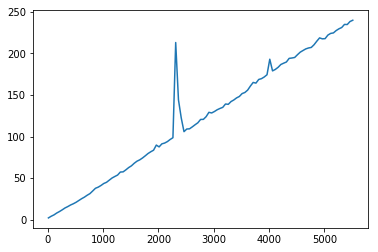

In [16]:
plt.plot(num_sentences, flair_times)

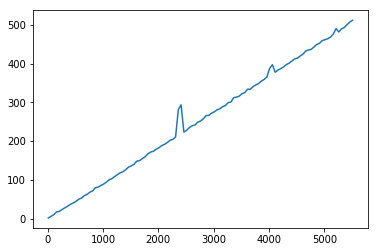

In [18]:
plt.plot(num_sentences, bert_times)

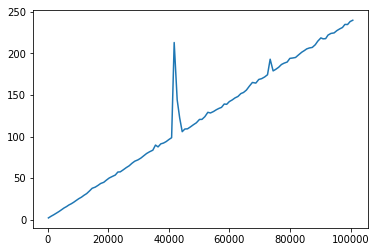

In [19]:
plt.plot(num_tokens, flair_times)

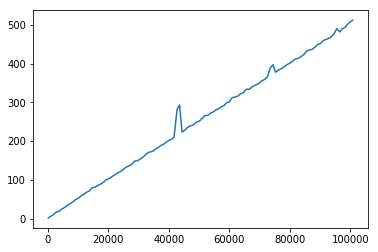

In [20]:
plt.plot(num_tokens, bert_times)